# Демонстрация центральной предельной теоремы

In [1]:
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [2]:
stats.rv_continuous

scipy.stats._distn_infrastructure.rv_continuous

Сгенерируем станартное нормальное распределение

In [3]:
mu = 0
sigma = 1

rv_norm = stats.norm(mu,sigma)

Text(0, 0.5, 'p(x)')

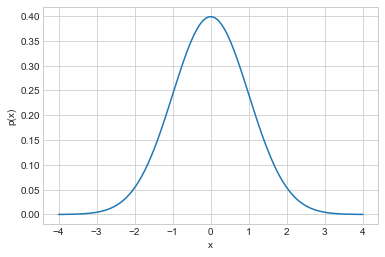

In [4]:
X = np.linspace(-4, 4, 100)
plt.plot(X, rv_norm.pdf(X))
plt.xlabel('x')
plt.ylabel('p(x)')

In [5]:
rv_norm.mean(), rv_norm.var()

(0.0, 1.0)

Напомним формулировку $\textbf{центральной предельной теоремы}$.

Пусть $X_{1},\ldots ,X_{n},\ldots$  — бесконечная последовательность независимых одинаково распределённых случайных величин, имеющих конечное математическое ожидание $\mu$  и дисперсию $\sigma ^{2}$.

$\textbf{Выборочным средним}$ называется случайная величина $\quad {\displaystyle {\overline{X}}_{n}={\frac {1}{n}}\sum \limits _{i=1}^{n}X_{i}}. \quad$

Тогда $\quad \boxed{\displaystyle {\sqrt {n}}\cdot {\frac {{\overline{X}}_{n}-\mu }{\sigma }}\to N(0,1)} \quad$ по распределению при ${\displaystyle n\to \infty }$.

### Проиллюстрируем ЦПТ двумя примерами: для показательного и равномерного распределений

In [6]:
rv_exp = stats.expon(loc=0, scale=1)

In [7]:
rv_exp.mean(), rv_exp.var()

(1.0, 1.0)

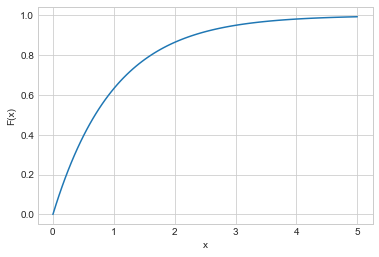

In [8]:
X = np.linspace(0,5,100)
plt.plot(X, rv_exp.cdf(X))
plt.xlabel('x')
plt.ylabel('F(x)')
plt.show()

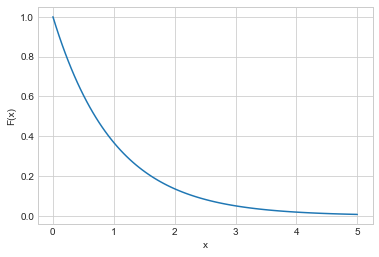

In [9]:
X = np.linspace(0,5,100)
plt.plot(X, rv_exp.pdf(X))
plt.xlabel('x')
plt.ylabel('F(x)')
plt.show()

In [10]:
rv_exp.rvs(10)

array([1.50730855, 0.80882618, 0.45396696, 0.55899418, 0.128118  ,
       0.55656323, 0.14348797, 1.75780013, 0.25499564, 1.66296613])

In [11]:
y = rv_exp.rvs((2, 10))
y

array([[0.72470382, 0.20247036, 0.5313595 , 1.36097998, 0.48121693,
        0.24907058, 0.95957769, 0.21301543, 3.49084479, 0.27929446],
       [0.25080731, 0.15474753, 0.04441455, 0.33267466, 1.87481193,
        1.59090521, 2.78851927, 0.48417438, 0.63013983, 1.15482289]])

Нам понадобится функция np.mean

In [12]:
a = np.array([[1, 2], [3, 4]])
print(a.mean())

2.5


In [13]:
np.mean(a, axis=0)

array([2., 3.])

In [14]:
np.mean(a, axis=1)

array([1.5, 3.5])

In [15]:
v = np.array([1, 2, 3])
(v - 5) / 2

array([-2. , -1.5, -1. ])

In [16]:
def CLT_visualisation(X, n):
    mu, sigma = X.mean(), X.std() # математическое ожидание и среднеквадратическое отклонение
    sample = X.rvs((n, 10000)) # генерация n выборок большого размера
    
    X_n = sample.mean(axis=0) # среднее арифметическое
    approximation = np.sqrt(n) * (X_n - mu) / sigma 
    plt.hist(approximation, bins=50, density=True, label='n = ' + str(n))
    
    Y = np.linspace(-4, 4, 100)
    plt.plot(Y, rv_norm.pdf(Y), linewidth=3, label='N(0, 1)')
    plt.legend()

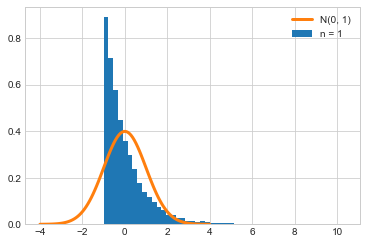

In [17]:
CLT_visualisation(rv_exp, 1)

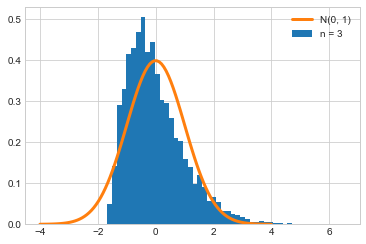

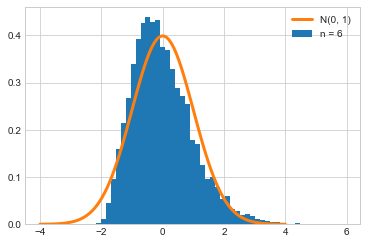

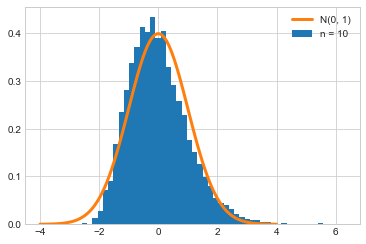

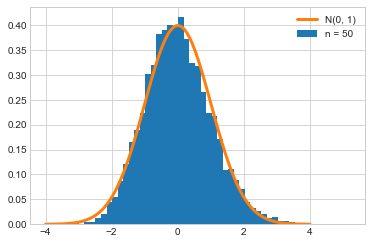

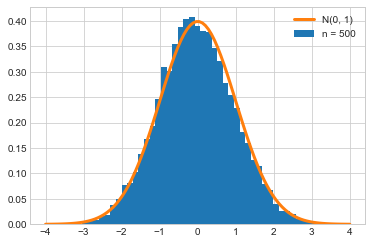

In [20]:
plt.figure(1)
CLT_visualisation(rv_exp, 3)
plt.figure(2)
CLT_visualisation(rv_exp, 6)
plt.figure(3)
CLT_visualisation(rv_exp, 10)
plt.figure(4)
CLT_visualisation(rv_exp, 50)
plt.figure(5)
CLT_visualisation(rv_exp, 500)

In [22]:
a, b = 0, 1
rv_uniform = stats.uniform(loc=a, scale=b-a)

Text(0, 0.5, 'p(x)')

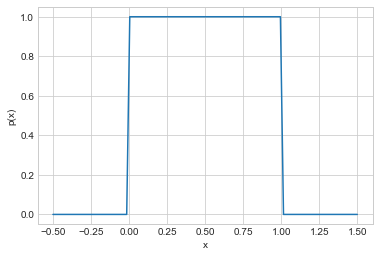

In [23]:
X = np.linspace(-0.5, 1.5, 100)
plt.plot(X, rv_uniform.pdf(X))
plt.xlabel('x')
plt.ylabel('p(x)')

## ЦПТ работает и для равновномерного распределения

In [24]:
rv_uniform.mean(), rv_uniform.var()

(0.5, 0.08333333333333333)

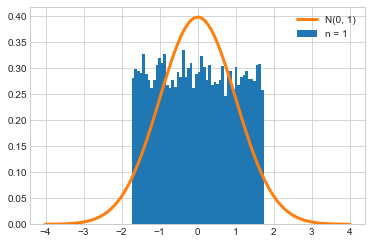

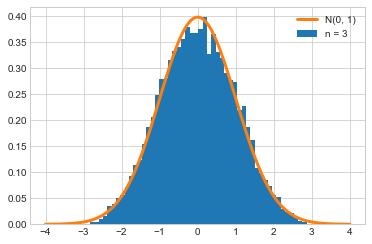

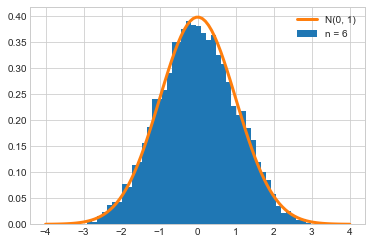

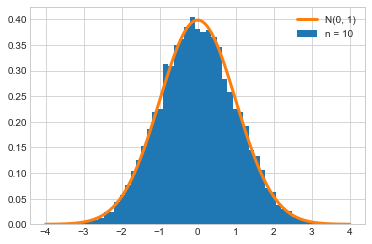

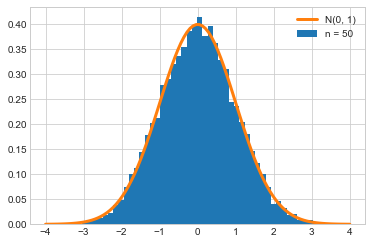

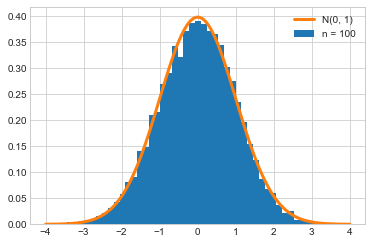

In [25]:
plt.figure(1)
CLT_visualisation(rv_uniform, 1)
plt.figure(2)
CLT_visualisation(rv_uniform, 3)
plt.figure(3)
CLT_visualisation(rv_uniform, 6)
plt.figure(4)
CLT_visualisation(rv_uniform, 10)
plt.figure(5)
CLT_visualisation(rv_uniform, 50)
plt.figure(6)
CLT_visualisation(rv_uniform, 100)